DecisionTreeClassifier
0.9957359211880605
0.8524807056229328
0.834789799525364


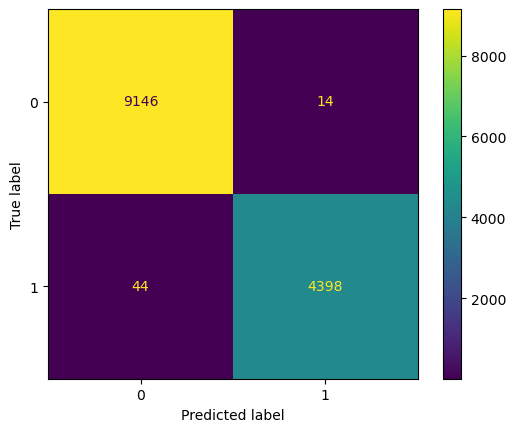

RandomForestClassifier
0.9957359211880605
0.893715545755237
0.8767861990531928


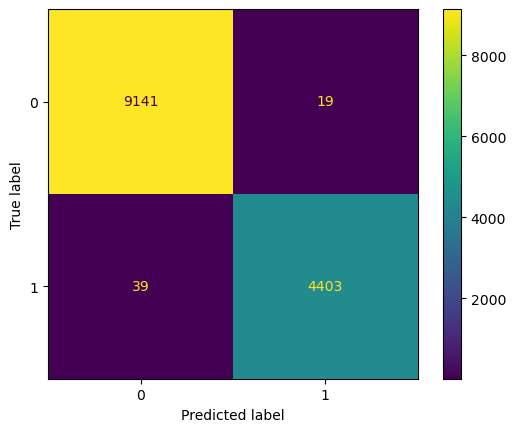

GaussianNB
0.387663578885458
0.3916207276736494
0.34679495007042854


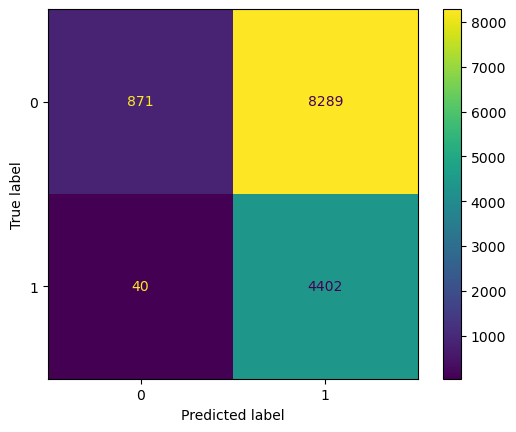

LinearDiscriminantAnalysis
0.7874577268048817
0.7933847850055127
0.7490582068362098


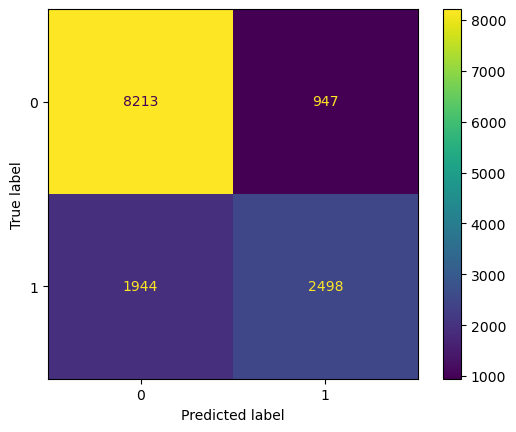

KNeighborsClassifier
0.8521540949860315
0.7951488423373759
0.7574444791353194


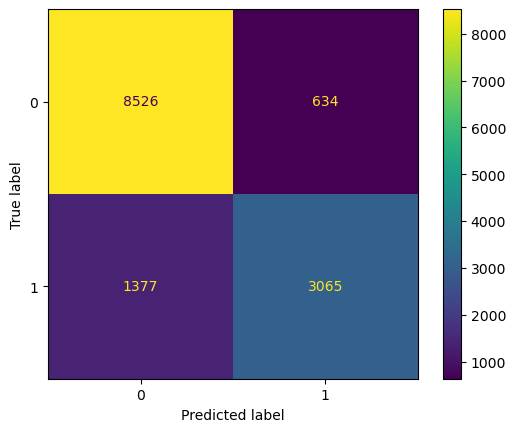

In [10]:
# RICERCA MODELLO MIGLIORE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# Caricamento dei dati di train e test
train_data = pd.read_csv("train__dataset.csv")
test_data = pd.read_csv("test__dataset.csv")

# Divido i dati di train tra features e output
x = train_data.iloc[: , :len(train_data.columns)-1]
y = train_data["booking_status"]


x_train, x_test, y_train, y_test = train_test_split(x, y)

# Creo i modelli
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = GaussianNB()
model4 = LinearDiscriminantAnalysis()
model5 = KNeighborsClassifier()

models = [model1,model2,model3,model4,model5]


# Trovo il modello più accurato
for model in models:
    # Alleno il modello
    model.fit(x_train, y_train)
    # Uso il modello per predire i valori
    predicted_test = model.predict(x_test)
    predicted_train = model.predict(x_train)
    # Accuratezza del modello creato
    
    print(type(model).__name__)
    print(accuracy_score(y_train, predicted_train))
    print(accuracy_score(y_test, predicted_test))
    print(f1_score(y_test, predicted_test, average='macro'))

    cm = confusion_matrix(y_train, predicted_train)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    plt.show()


In [18]:
# ESEMPIO di utilizzo del modello migliore trovato per classificare i dati di test
# Ricreo il modello da 0 così da allenarlo con TUTTI i dati di train

# Estraggo i dataframe dai csv
train_df = pd.read_csv("train__dataset.csv")
test_df = pd.read_csv("test__dataset.csv")

# Divido i dati di train tra features e output
x_train = train_df.iloc[: , :len(train_df.columns)-1]
y_train = train_df["booking_status"]


# Creo il modello
model = RandomForestClassifier()

# Alleno il modello direttamente con tutti i dati di train
model.fit(x_train, y_train)


# Uso il modello per predire i valori del dataframe di test
predicted = model.predict(test_df)

confirmed = sum(predicted)/len(predicted) *100
canceled = (len(predicted)-sum(predicted))/len(predicted) *100
print("Percentuale di utenti che CONFERMERANNO la prenotazione: ",canceled)
print("Percentuale di utenti che ANNULLERANNO la prenotazione: ",confirmed)





Percentuale di utenti che CONFERMERANNO la prenotazione:  70.3495423971772
Percentuale di utenti che ANNULLERANNO la prenotazione:  29.650457602822804
